# **Alcohol consumption**
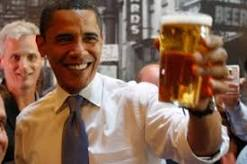

גבריאל רימר

30.04.2024


בחרתי בנושא זה כי ענייו אותי היכן שותים הכי הרבה אלכוהול, וגם מה ההשפעות של אלכוהול לתווך ארוך על אנשים.

שאלות שהתעסקתי בעבודה הן:
* באיזו יבשת שותים יותר אלכוהול ?
* איזה מדינה שותים הכי הרבה אלכוהול מהיבשות הנבדקות?
* מה השפעת צריכת האלכוהול על רמת השמחה ?
* מה השפעת צריכת האלכוהול על הבריאות ?


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('total-alcohol-consumption-per-capita-litres-of-pure- ahcool new.csv')

In [28]:
df = df.rename(columns={'Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)': 'Total consumption'}) 
#בשביל שימוש יותר קל "Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)" שינוי שם לעמודה 

In [29]:
df['Total consumption'] = df['Total consumption'].astype(float) # change the type of "Total consumption" to float

In [30]:
continents = pd.read_csv('Countries_by_continents.csv')# מערך מידע עם כל המדינות מחולקות ליבשות

df = pd.merge(df, continents, left_on='Entity', right_on='Country', how='left')
df.drop('Country', axis=1, inplace=True)# הוספה של עמודת יבשות

column_order = ['Entity', 'Code', 'Year', 'Total consumption', 'Continent']
df=df[column_order]

df

,Entity,Code,Year,Total consumption,Continent
0,Afghanistan,AFG,2010,0.21,Asia
1,Afghanistan,AFG,2015,0.21,Asia
2,Afghanistan,AFG,2018,0.21,Asia
3,Albania,ALB,2000,6.57,Europe
4,Albania,ALB,2005,7.65,Europe
...,...,...,...,...,...
921,Zimbabwe,ZWE,2000,2.46,Africa
922,Zimbabwe,ZWE,2005,2.77,Africa
923,Zimbabwe,ZWE,2010,3.93,Africa
924,Zimbabwe,ZWE,2015,4.92,Africa


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Entity             926 non-null    object 
 1   Code               924 non-null    object 
 2   Year               926 non-null    int64  
 3   Total consumption  926 non-null    float64
 4   Continent          894 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 36.3+ KB


#### **איסוף מידע ראשוני**
כמות הרשומות בבסיס הנתונים 926
* Entity - מדינה או מדינות
* Code - שם מקוצר למדינה/ות
* Year - שנה שבה נערכה הבדיקה
* Total consumption - סך כל צריכת האלכוהול לכל אדם בליטרים 
* Continent - יבשת


ליטר 1 = 20 ליטר של בירה 5%

מאגר הנתונים על שתיית האלכוהול - https://www.kaggle.com/datasets/willianoliveiragibin/alcohol-consumption

מאגר הנתונים של המדינות מחולקות ליבשות - https://www.kaggle.com/datasets/hserdaraltan/countries-by-continent 

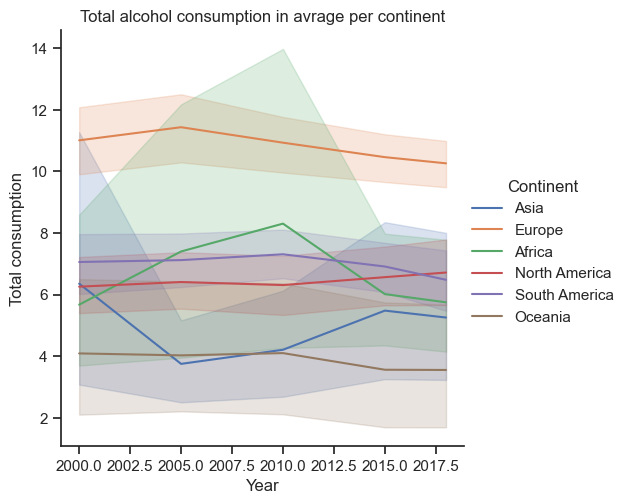

In [32]:
# Graph 1
sns.set_theme(style='ticks')

sns.relplot(data=df, x='Year', y= 'Total consumption',hue='Continent',kind='line') #

plt.title('Total alcohol consumption in avrage per continent')

plt.show()

### **גרף 1**
ניתן להסיק מגרף מספר 1 שבממוצע בכל העולם חוץ מאירופה שותים בין 4 - 8 ליטר של אלכוהול טהור. באירופה שותים הכי הרבה אלכוהול בממוצע בין 10 - 12 ליטרים לאדם.
בנוסף לא ניתן להסתמך על המידע באסיה ואפריקה מפני שסתיית התקן בהן גדולה מאוד, ולכן הגרף לא מייצג את הממוצע בצורה טובה ביבשות הללו. לכן החלטתי לא להשתמש במידע מהיבשות אפריקה ואסיה.

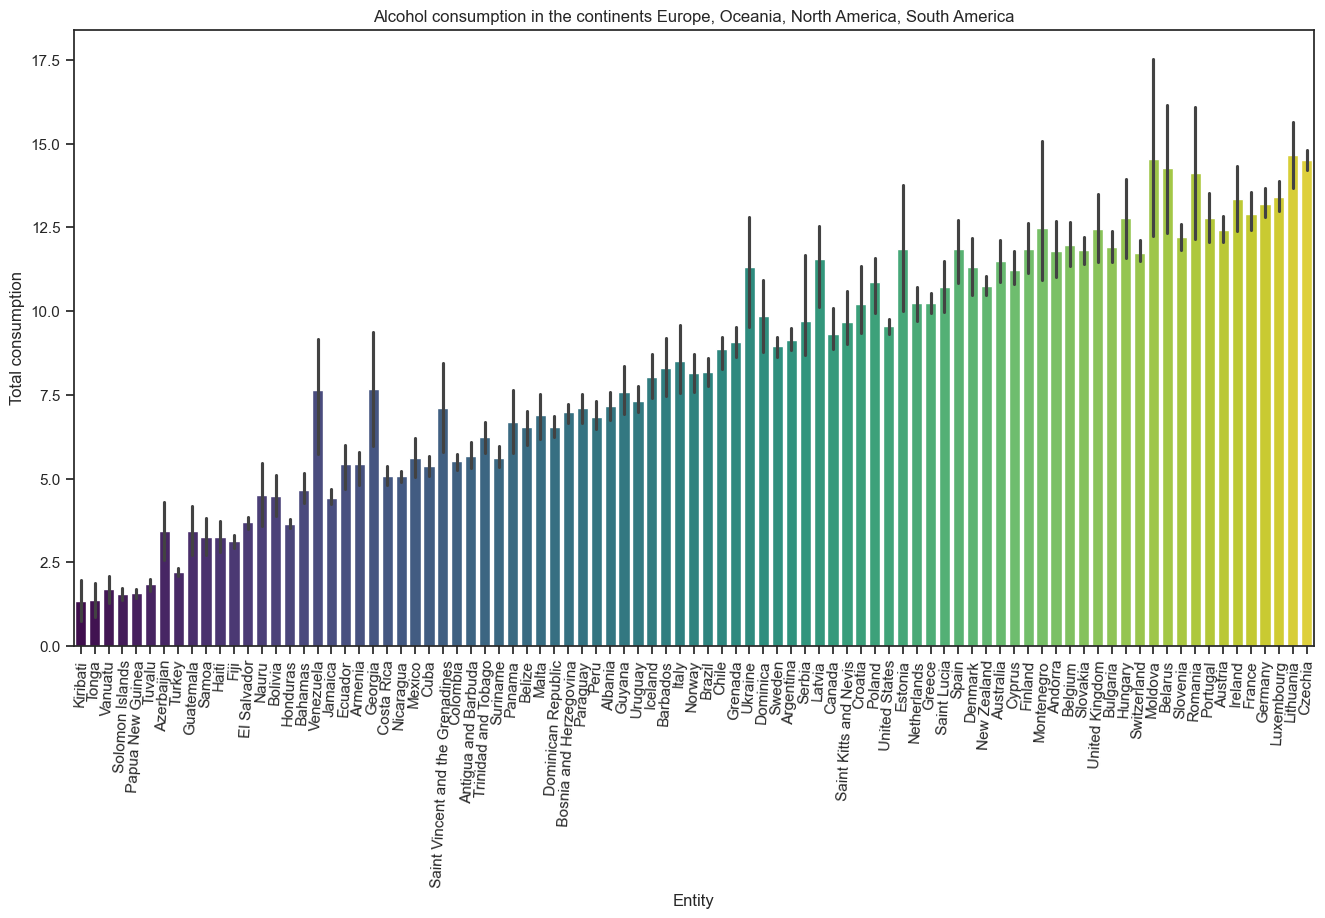

In [33]:
#Graph 2
valid_world = df[(df['Continent'] == 'Europe') | (df['Continent'] == 'Oceania') | (df['Continent'] == 'North America') | (df['Continent'] == 'South America')]

valid_world = valid_world.sort_values(by='Total consumption')

plt.figure(figsize=(16,8))

sns.set_theme(style='ticks')
sns.barplot(data=valid_world,x='Entity',y='Total consumption',hue='Entity',palette='viridis')

plt.xticks(rotation=87)

plt.title('Alcohol consumption in the continents Europe, Oceania, North America, South America')

plt.show()

### **גרף 2**
מגרף זה אני רואה שבמדינות שנבדקו חמשת המדינות ששותות הכי הרבה אלכוהול בממוצע הן:
1. צ'כיה
2. ליטא
3. לקסנבורג
4. גרמניה
5. צרפת

וחמשת המדינות ששותות הכי פחות הן:
1. קיריבטי
2. טונגה
3. וונואטו
4. איי הסלמון
5. פאפא ניו גיני 

In [34]:
happiness = pd.read_csv('2015.csv')

happiness.drop('Region',axis=1,inplace=True)
happiness.drop('Happiness Rank',axis=1,inplace=True)
happiness.drop('Standard Error',axis=1,inplace=True)
happiness.drop('Freedom',axis=1,inplace=True)
happiness.drop('Trust (Government Corruption)',axis=1,inplace=True)
happiness.drop('Family',axis=1,inplace=True)
happiness.drop('Dystopia Residual',axis=1,inplace=True)
#הורדת כל העמודות שלא מתאימות למחקר
world_happiness = pd.merge(valid_world, happiness, left_on='Entity', right_on='Country', how='inner')
world_happiness.drop('Country', axis=1, inplace=True)

world_happiness 

,Entity,Code,Year,Total consumption,Continent,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Generosity
0,Azerbaijan,AZE,2005,1.81,Europe,5.212,1.02389,0.64045,0.07799
1,Turkey,TUR,2018,2.05,Europe,5.332,1.06098,0.73172,0.12253
2,Turkey,TUR,2015,2.12,Europe,5.332,1.06098,0.73172,0.12253
3,Turkey,TUR,2005,2.12,Europe,5.332,1.06098,0.73172,0.12253
4,Turkey,TUR,2010,2.32,Europe,5.332,1.06098,0.73172,0.12253
...,...,...,...,...,...,...,...,...,...
324,Romania,ROU,2005,15.84,Europe,5.124,1.04345,0.76890,0.13748
325,Lithuania,LTU,2005,16.10,Europe,5.833,1.14723,0.73128,0.02641
326,Belarus,BLR,2010,17.43,Europe,5.813,1.03192,0.73608,0.11046
327,Romania,ROU,2000,17.45,Europe,5.124,1.04345,0.76890,0.13748


הוספתי מאגר נתונים נוסף על מנת לחקור את הדברים הבאים בהשפעת האלכוהול
* Happiness Score - מדד השמחה
* Economy (GDP per Capita) - מדד הסוציו אקונומי של אדם ממוצע
* Health (Life Expectancy) - בריאות, תוכלת החיים
* Generosity - מדד הנדיבות

מאגר המידע - https://www.kaggle.com/datasets/unsdsn/world-happiness

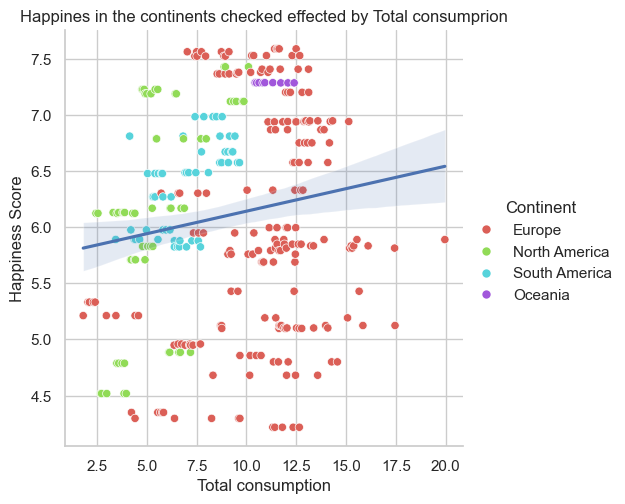

In [35]:
#Graph 3
sns.set_theme(style="whitegrid")

scatter_plot = sns.relplot(data=world_happiness, x='Total consumption', y='Happiness Score', hue='Continent', palette="hls")

sns.regplot(data=world_happiness, x='Total consumption', y='Happiness Score', scatter=False, ax=scatter_plot.ax)

plt.title('Happines in the continents checked effected by Total consumprion')

plt.show()

### **גרף 3**
.ככל ששותים יותר אלכוהול אנשים יותר שמחים במדינות שבדקתי עליהן בממוצע

<Axes: >

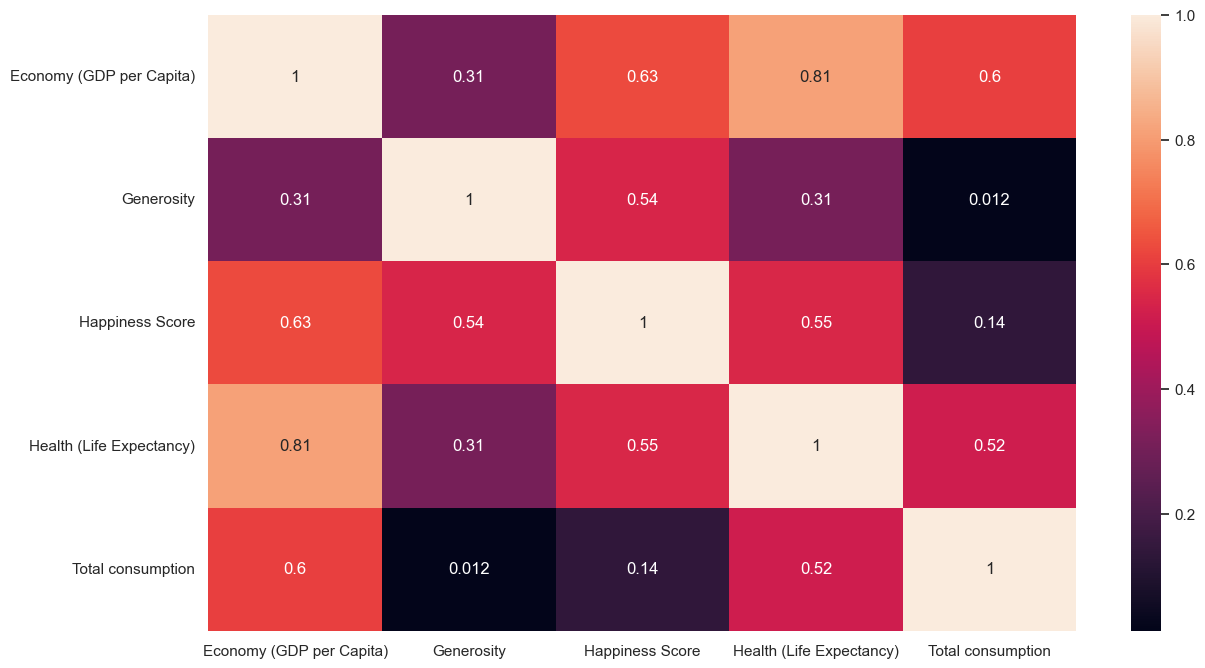

In [36]:
corelation_pivot = pd.pivot_table(data=world_happiness[world_happiness['Year']==2015],index= ['Entity','Continent'] ,columns=[],values=['Total consumption','Happiness Score','Economy (GDP per Capita)','Health (Life Expectancy)','Generosity'])


plt.figure(figsize=(14,8))
sns.heatmap(corelation_pivot.corr(), annot=True)

### **גרף 4**
ניתן לראות שקיים קשר בין כל המדדים לבין שתיית אלכוהול.

שתיית אלכוהול ותוכלת החיים מקיימים יחס ישר בצורה חזקה.

.שתיית אלכוהול ומדד הסוציואקונומי של האנשים בממוצע עולה ביחס ישר

שתיית אלכוהול ומדד הנדיבות מקיימים יחס ישר אך לא חזק במיוחד וכך גם עם מדד השמחה.

אפשר לומר שהמדדים אינם קשורים זה לזה בגלל שבדקתי מדינות מערביות עם תרבות שתייה מפותחת והאנשים במדינות מערביות הם בעלי תוכלת חיים גבוהה, מדד שמחה גבוהה ומעמד סוציואקונומי גבוהה. 

להפתעתי מידת הנדיבות אינה משתנמה בצורה דרסטית כתוצאה מימוש באלכוהול. 

אבל בנוסף ניתן לטעון ששתיית אלכוהול כן משפיע על כל המדדים כמו שהראתי בגרף 3 עלייה בשתיית אלכוהול הראתה עליה במדד השמחה של האנשים במדינות הנבדקות.

סוגי הגרפים היו מתאימים לדברים שחקרתי.

### **רפלקציה**

python נהנתי לבצע את המחקר ולמדתי הרבה על השימוש בשפה 

pandas, seaborn, matlab במהלך העבודה למדתי לעבוד עם הסיפריות 

בנוסף גיליתי דברים חדשים על צריכת האלכוהול בעולם והשפעותיו על אנשים.

עבדתי עם כמה מקורות מידע וכמה טבלאות וכך למדתי להתעסק בדברים החשובים למחקר שלי ולבחור את הדברים שמעניינים אותי. 
